# Load dataset

In [3]:
import pandas as pd

output_path = './Salary_Data.csv'

path = output_path
df = pd.read_csv(output_path)

x = df["YearsExperience"]
y = df["Salary"]
df.head(5)

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2


###  =====================================================================
#### @Loss Function 描述的是單個訓練樣本的預測誤差。它衡量的是模型預測值和真實值之間的不一致程度
#### @Cost Function 通常是整個訓練集上所有"樣本損失的總和或平均值，有時也被稱為 "objective function" 或 "optimization function"。


# build a cost funciton (mean square errors)

In [4]:
w = 10
b = 0
y_pred = w*x + b
cost = (y - y_pred)**2
cost.sum() / len(x)

602.547878787879

In [5]:
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)

  return cost

compute_cost(x, y, 10, 0)

602.547878787879

In [6]:
# if b=0, w=-100~100. what is the cost ?

costs = [] #create a column(list)

for w in range(-100, 101):
    cost = compute_cost(x, y, w, 0)
    costs.append(cost)
costs    


[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393

In [7]:
# export the dataset as csv file.
import os

df = pd.DataFrame([ws, bs, costs]).T  # .T 是轉置，使得每個列表成為一列而非一行
df.columns = ["ws", "bs", "cost"]
file_path = "./Df_cost.csv"
df.to_csv(file_path)
!ls

# remove the file .

# try:
#     os.remove(file_path)
#     print(f"{file_path} 已成功刪除")
# except OSError as e:
#     print(f"刪除 {file_path} 時出現錯誤: {e.strerror}")
# !ls

NameError: name 'ws' is not defined

# Draw the cost as function

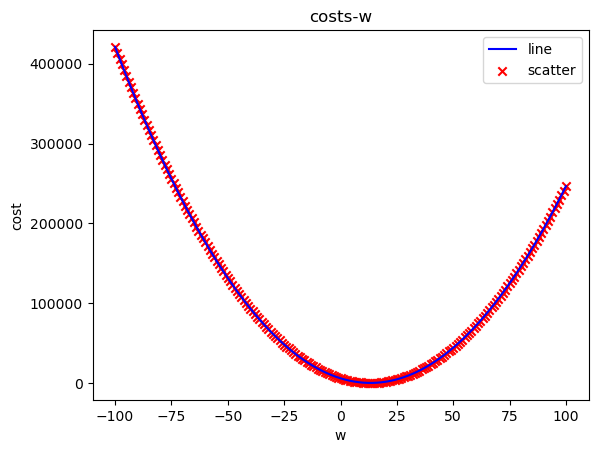

In [8]:
def plot_scatter(x, y):
  import matplotlib.pyplot as plt
  plt.plot(x, y, color = "blue", label = "line")
  plt.scatter(x, y, marker="x", color = "red", label = "scatter")
  plt.title("costs-w")
  plt.xlabel("w")
  plt.ylabel("cost")
  # plt.xlim([-100, 101])
  # plt.ylim([-60, 140])
  plt.legend()    
  plt.show()

# xl = np.
plot_scatter(range(-100, 101), costs)


In [9]:
# if w=-100~100 and b=-100~100. what is the cost ?
import time
import numpy as np # numpy vs pandas

start_time = time.time()  # Start timing

ws = range(-100,101)
bs = range(-100, 101)
costs = np.zeros((201, 201))

i=0
for w in ws:
  j=0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs [i,j] =cost    
    j = j+1
#     j += 1
  i = i+1
# i += 1

costs
end_time = time.time()  # End timing
print(f"Loop took {end_time - start_time} seconds to complete.")


Loop took 8.443924188613892 seconds to complete.


In [10]:
help(plt.axes)

Help on function axes in module matplotlib.pyplot:

axes(arg=None, **kwargs)
    Add an Axes to the current figure and make it the current Axes.
    
    Call signatures::
    
        plt.axes()
        plt.axes(rect, projection=None, polar=False, **kwargs)
        plt.axes(ax)
    
    Parameters
    ----------
    arg : None or 4-tuple
        The exact behavior of this function depends on the type:
    
        - *None*: A new full window Axes is added using
          ``subplot(**kwargs)``.
        - 4-tuple of floats *rect* = ``[left, bottom, width, height]``.
          A new Axes is added with dimensions *rect* in normalized
          (0, 1) units using `~.Figure.add_axes` on the current figure.
    
    projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}, optional
        The projection type of the `~.axes.Axes`. *str* is the name of
        a custom projection, see `~matplotlib.projections`. The default
        None results in a 'rectili

32.6948484848485
當w=9, b=29 會有最小cost:32.6948484848485


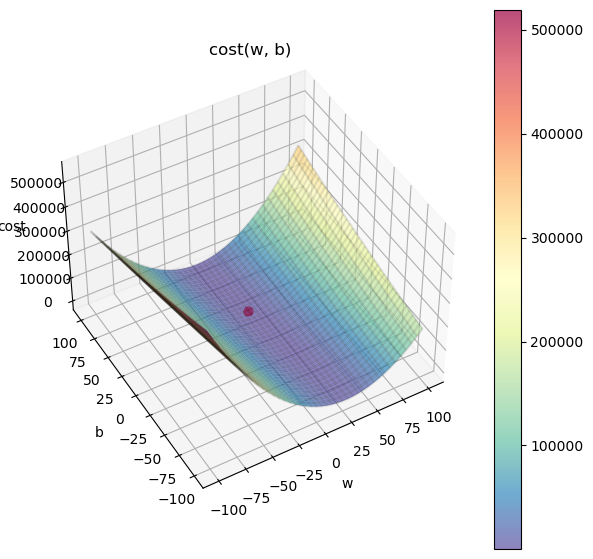

In [15]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager
import matplotlib.pyplot as plt

# fontManager.addfont("ChineseFont.ttf")
# mpl.rc('font', family="ChineseFont")

fig, ax = plt.subplots(1, 1, figsize=(7, 7), subplot_kw={'projection': '3d'})   # subplot_kw keyword for 3d surface profile.

# # or
# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_subplot(1, 1, 1, projection='3d')      #用於添加規則網格的子圖

# # or    (https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.axes.html)
# plt.figure(figsize=(7, 7))
# ax = plt.axes(projection="3d")                     #用於添加任意位置和大小的軸(圖)

ax.view_init(45, -120)                                # view angle 俯仰角 方位角
b_grid, w_grid = np.meshgrid(bs, ws)                  # https://wangyeming.github.io/2018/11/12/numpy-meshgrid/

ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.7)   #alpha 透明度
ax.plot_wireframe(w_grid, b_grid, costs, color="black", alpha=0.1)

ax.set_title("cost(w, b)")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

# find the minima cost and mark it on the contour.
print(np.min(costs))

w_index, b_index = np.where(costs == np.min(costs))

w_index = int(w_index)
b_index = int(b_index)

ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)

# plt.show()

print(f"當w={ws[w_index]}, b={bs[b_index]} 會有最小cost:{costs[w_index, b_index]}")


plt.show()

### Q. Please add a color code for clearly descirbing the 3d countour.

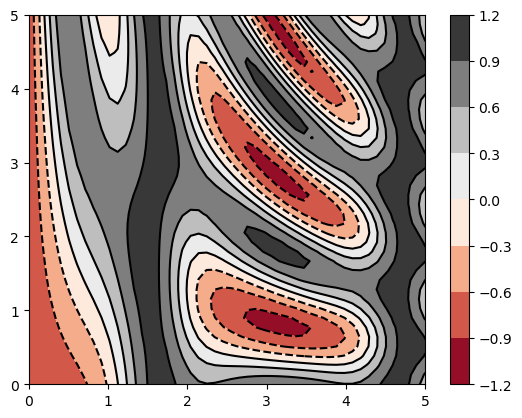

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数 f(x, y)
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

# 生成 x 和 y 的值
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

# 生成网格
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 绘制等高线图
plt.contour(X, Y, Z, colors='black')  # 绘制等高线
plt.contourf(X, Y, Z, cmap='RdGy')  # 绘制填充的等高线
plt.colorbar()  # 添加颜色条

# 显示图形
plt.show()

### Q. Please use our dataset to draw the countour.

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        # z=costs,
        # x=ws, # horizontal axis
        # y=bs, # vertical axis
        z=dd["cost"],
        x=dd["ws"], # horizontal axis
        y=dd["bs"], # vertical axis
        
        contours=dict(
            coloring ='heatmap',
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 12,
                color = 'white',
        )),
        colorbar=dict(nticks=10, ticks='outside',
                      ticklen=5, tickwidth=1,
                      title='cost', # title here
                      showticklabels=True,
                      tickangle=30, tickfont_size=12)
        
    ))
fig.show()


NameError: name 'dd' is not defined